### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [56]:
data = pd.read_csv('data/coupons.csv')

In [57]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [58]:
print("List of columns \n",data.columns)
print(data.info())
print("Null Values \n",data.isna().sum())

List of columns 
 Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  obje

Car column has 99% null Values.

In [59]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [60]:
# Car column has 99% null Values. Dropping the car column.
data = data.drop(['car'], axis=1)

Below are the missing Values which are around 1% rows. Dropping those row with NaN

Bar 107 CoffeeHouse 217 CarryAway 151 RestaurantLessThan20 130 Restaurant20To50 189

In [61]:
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [62]:
Y_value_counts = data.groupby('Y').Y.count()
print('The number of users that are accepted the coupon is ',Y_value_counts[1],',',round(Y_value_counts[1]/data.shape[0]*100,3),'%')
print('The number of users that are rejected the coupon is ',Y_value_counts[0],',',round(Y_value_counts[0]/data.shape[0]*100,3),'%')

The number of users that are accepted the coupon is  6877 , 56.934 %
The number of users that are rejected the coupon is  5202 , 43.066 %


### The number of users that are accepted the coupon is  6877 , 56.934 %
### The number of users that are rejected the coupon is  5202 , 43.066 %

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Gender Vs Coupon Accepted Ratio'}, xlabel='gender', ylabel='Y'>

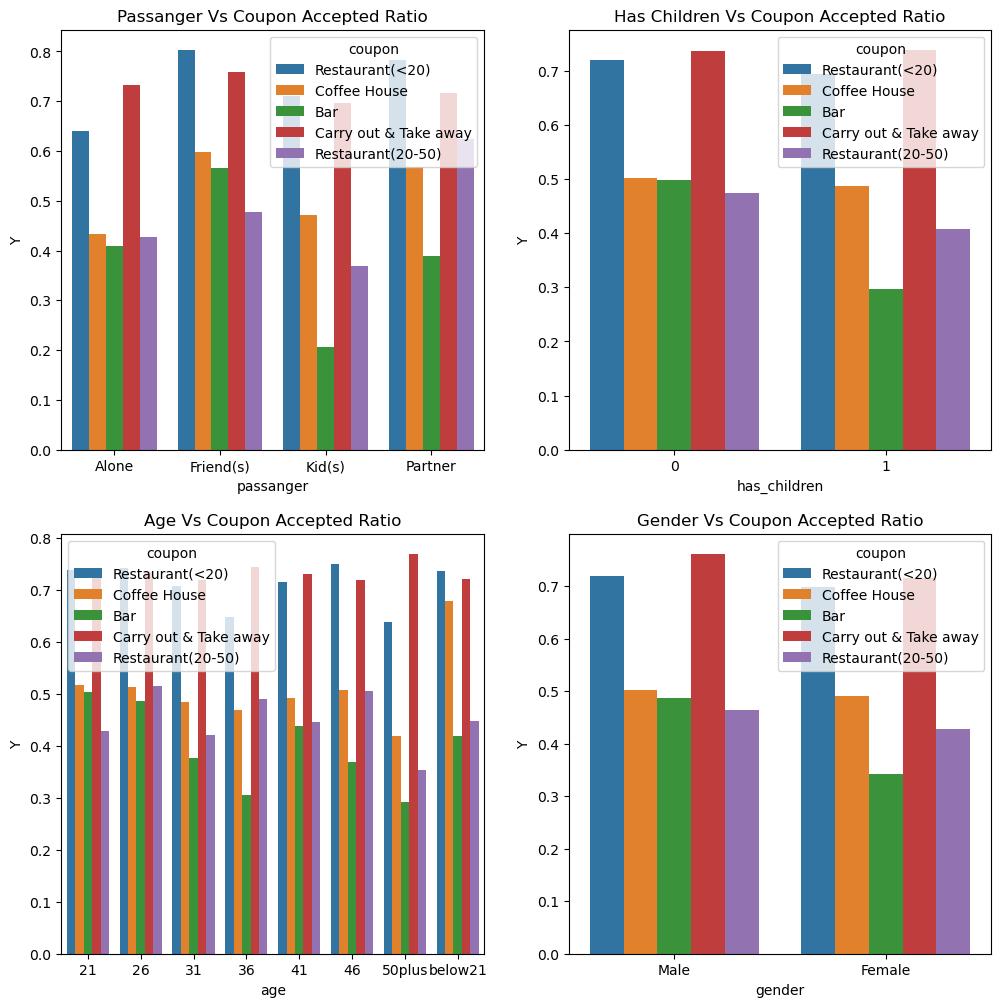

In [63]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.title('Passanger Vs Coupon Accepted Ratio')
sns.barplot(x='passanger', y = 'Y', hue='coupon', errorbar=None, data=data )


plt.subplot(222)
plt.title('Has Children Vs Coupon Accepted Ratio')
sns.barplot(x='has_children', y = 'Y', hue='coupon', errorbar=None, data=data )


plt.subplot(223)
plt.title('Age Vs Coupon Accepted Ratio')
sns.barplot(x=data.sort_values(by=['age'])['age'],y = 'Y', hue='coupon',errorbar=None, data=data)


plt.subplot(224)
plt.title('Gender Vs Coupon Accepted Ratio')
sns.barplot(x='gender',y = 'Y', hue='coupon',errorbar=None, data=data)

Text(0.5, 1.0, 'Coupon Accepted based on Marital Status in Vehicle')

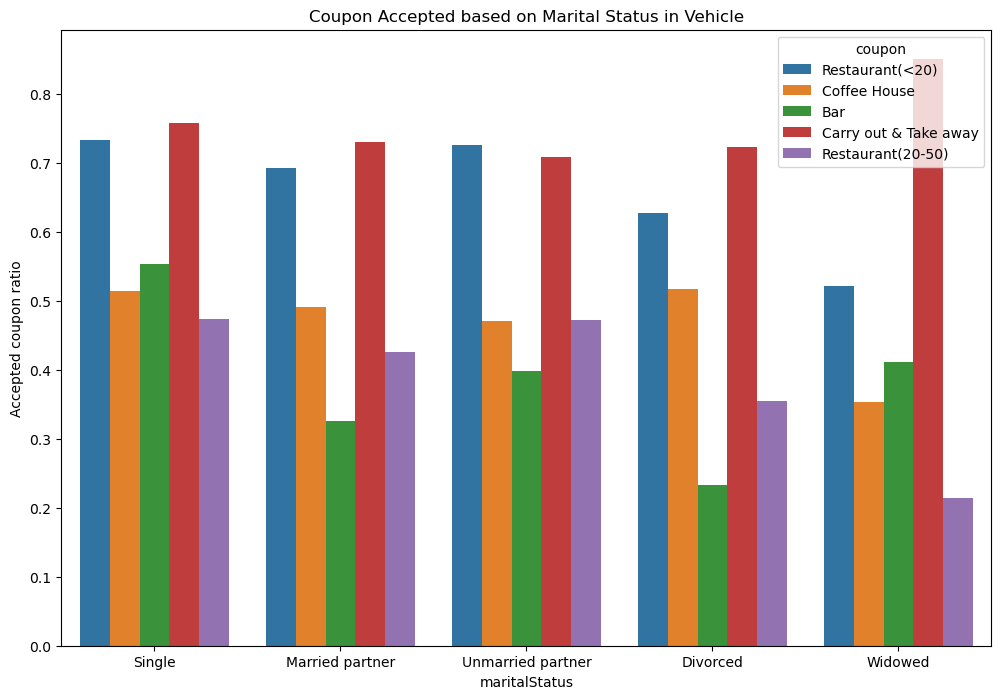

In [64]:
plt.figure(figsize=(12,8))
fig = sns.barplot(x="maritalStatus", y="Y", hue='coupon', errorbar=None, data=data)
plt.ylabel('Accepted coupon ratio')
plt.title('Coupon Accepted based on Marital Status in Vehicle')

6. Use a histogram to visualize the temperature column.

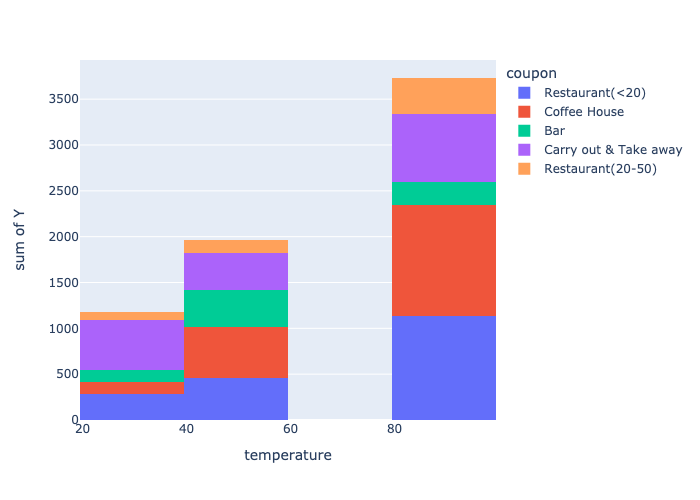

In [65]:
fig = px.histogram(data, x = "temperature", y = "Y", color='coupon')
fig.show("png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [66]:
df_bar = data[["Bar" ,"coupon", "age","Y"]]
df_only_bar = df_bar.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [67]:
print('Ratio of Bar Coupons accepted and Bar Coupons offered', (df_bar.query('coupon == "Bar"').Y.sum()/df_bar.query('coupon == "Bar"').Y.count() ))
print('Percent of Bar Coupons accepted and Bar Coupons offered', round((df_bar.query('coupon == "Bar"').Y.sum()/df_bar.query('coupon == "Bar"').Y.count() )*100,3),'%')

Ratio of Bar Coupons accepted and Bar Coupons offered 0.41191845269210664
Percent of Bar Coupons accepted and Bar Coupons offered 41.192 %


Ratio of Bar Coupons accepted and Bar Coupons offered 0.41191845269210664 or 41.192 %

In [68]:
print('Ratio of Bar Coupons accepted and Coupons accepted', (df_bar.query('coupon == "Bar"').Y.sum()/df_bar.Y.sum() ))
print('Percent of Bar accepted and Total Coupons accepted', round((df_bar.query('coupon == "Bar"').Y.sum()/df_bar.Y.sum() )*100,3),'%')

print('Ratio of Bar Coupons accepted and Coupons Offered', (df_bar.query('coupon == "Bar"').Y.sum()/df_bar.Y.count() ))
print('Percent of Bar accepted and Total Coupons Offered', round((df_bar.query('coupon == "Bar"').Y.sum()/df_bar.Y.count() )*100,3),'%')

Ratio of Bar Coupons accepted and Coupons accepted 0.11458484804420532
Percent of Bar accepted and Total Coupons accepted 11.458 %
Ratio of Bar Coupons accepted and Coupons Offered 0.06523718850898254
Percent of Bar accepted and Total Coupons Offered 6.524 %


Ratio of Bar Coupons accepted and Coupons accepted 0.11458484804420532 or 11.458%

Ratio of Bar Coupons accepted and Coupons Offered 0.06523718850898254 or 6.524%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [69]:
bar_list_3_or_less = ["1~3","less1","never"]
bar_3_or_below = df_only_bar.query('Bar in @bar_list_3_or_less')
bar_list_3_or_more = ["4~8","gt8"]
bar_3_or_more = df_only_bar.query('Bar in @bar_list_3_or_more')

print('Acceptance rate of driver those who went to bar 3 or less times a month',(bar_3_or_below.Y.sum()/df_only_bar.Y.sum()))
print(round((bar_3_or_below.Y.sum()/df_only_bar.Y.sum())*100,3),'%')

print('Acceptance rate of driver those who went to bar 3 or more times a month',(bar_3_or_more.Y.sum()/df_only_bar.Y.sum()))
print(round((bar_3_or_more.Y.sum()/df_only_bar.Y.sum())*100,3),'%')

Acceptance rate of driver those who went to bar 3 or less times a month 0.8134517766497462
81.345 %
Acceptance rate of driver those who went to bar 3 or more times a month 0.1865482233502538
18.655 %


Acceptance rate of driver those who went to bar 3 or less times a month is 81.345%

Acceptance rate of driver those who went to bar 3 or more times a month is 18.655 %

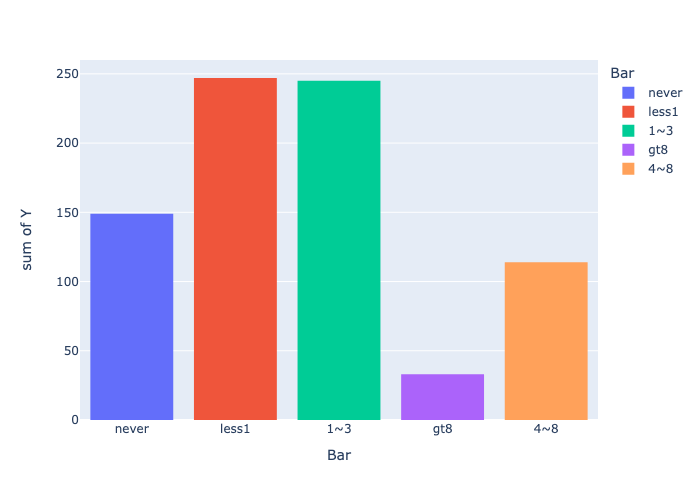

In [70]:
fig = px.histogram(df_only_bar, x = "Bar", y = "Y", color = "Bar")
fig.show("png")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [71]:
bar_list_1_or_more = ["1~3","gt8","4~8"]
bar_list_1_or_less = ["never","less1"]
age_list_25_or_more = ["26","31","36","41","46","50plus"]
age_list_25_or_less = ["below21","21"]

age_25_more_and_bar_once_or_more = df_only_bar.query("Bar in @bar_list_1_or_more and age in @age_list_25_or_more")

age_25_or_below_and_bar_1_less = df_only_bar.query("Bar in @bar_list_1_or_less and age in @age_list_25_or_less")

print('Acceptance for drivers who go to a bar more than once a month and are over the age of 25 is', 
      round((age_25_more_and_bar_once_or_more.Y.sum() / df_only_bar.Y.sum())*100,3),'%')

print('Acceptance for drivers who go to a bar less than once a month and are under the age of 25 is', 
      round((age_25_or_below_and_bar_1_less.Y.sum() / df_only_bar.Y.sum())*100,3),'%')

Acceptance for drivers who go to a bar more than once a month and are over the age of 25 is 35.279 %
Acceptance for drivers who go to a bar less than once a month and are under the age of 25 is 15.228 %


Acceptance for drivers who go to a bar more than once a month and are over the age of 25 is 35.279 %
Acceptance for drivers who go to a bar less than once a month and are under the age of 25 is 15.228 %

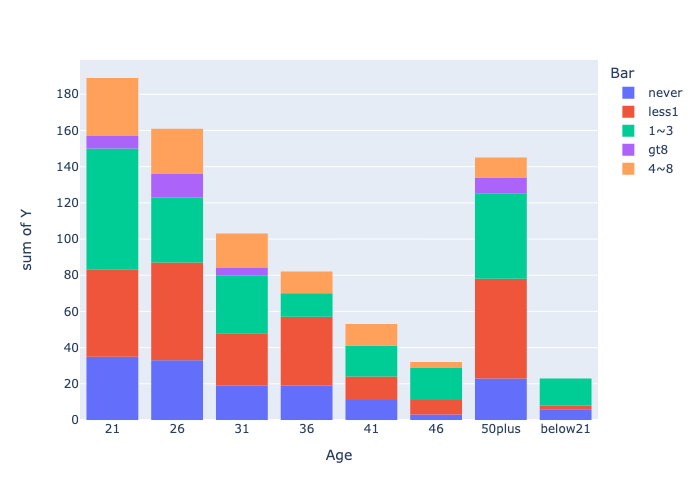

In [72]:
fig = px.histogram(df_only_bar, x = df_only_bar.sort_values(by=['age'])['age'], y = "Y", color='Bar', labels={"x":"Age"})
fig.show("png")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [73]:
df5_bar = data[["Bar","coupon", "age","passanger","occupation","Y"]]
df5_only_bar = df5_bar.query("coupon == 'Bar'")
bar_list = ["1~3","gt8","4~8"]
passanger_list = ["Friend(s)","Partner"]
df5_all_filters = df5_only_bar.query("Bar in @bar_list and passanger in @passanger_list and (occupation != 'Farming Fishing & Forestry')")

print('The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is'
      ,round((df5_all_filters.Y.sum()/df5_only_bar.Y.sum())*100,3),'%')

The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 17.132 %


The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 17.132 %

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [74]:
#Create new DataFrame with required column
df6_bar = data[["Bar" , "coupon", "age", "passanger", "income", "maritalStatus", "RestaurantLessThan20","Y"]]
#Filter with drivers accepted coupon for Bar
df6_only_bar = df6_bar.query("coupon == 'Bar'")

In [75]:
bar_list = ["1~3","gt8","4~8"]
passanger_list = ["Friend(s)","Partner"]
df6_cond1 = df6_only_bar.query("Bar in @bar_list and passanger in @passanger_list and maritalStatus != 'Widowed'")

print('Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is ',
      round((df6_cond1.Y.sum()/df6_only_bar.Y.sum())*100,3),'%')

Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is  17.132 %


Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is  17.132 %

In [76]:
bar_list = ["1~3","gt8","4~8"]
age_list_under_30 = ["21","26","below21"]
df6_cond2 = df6_only_bar.query("Bar in @bar_list and age in @age_list_under_30")
print('Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is', 
      round((df6_cond2.Y.sum()/df6_only_bar.Y.sum())*100,3),'%')

Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 29.949 %


Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 29.949 %

In [77]:
RestaurantLessThan20_list = ["4~8","gt8"]
income_list = ["$12500 - $24999","$25000 - $37499","$37500 - $49999", "Less than $12500"]
df6_cond3 = df6_only_bar.query("RestaurantLessThan20 in @RestaurantLessThan20_list and income in @income_list")
print('Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is', 
      round((df6_cond3.Y.sum()/df6_only_bar.Y.sum())*100,3),'%')

Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 19.289 %


Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 19.289 %

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Acceptance rate of driver those who went to bar 3 or less times a month is 81.345%, which is higher compare to all other acceptance rate.**

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

For this Independent Investigation, I choose CoffeeHouse coupon.
Compare the acceptance rates between those drivers who:
1. go to Coffee House more than 4 times a month, driving alone and before noon. 
2. go to Coffee House more than once a month, driving with a passanger and are under the age of 30
3. Carry out & Take away more than 4 times a month, when the temparature is 80
4. Are under the age of 30 and accepts coupon before noon

In [78]:
df7 = data[["CoffeeHouse" , "coupon", "age", "passanger", "maritalStatus", "time","temperature","CarryAway","Y"]]
df7_only_coffee = df7.query("coupon == 'Coffee House'")
coffee_list_more_4 = ["gt8","4~8"]
coffee_list_more_1 = ["1~3","gt8","4~8"]
age_list7 = ["21","26","below21"]
time_list7 = ["7AM","10AM"]
total_accepted_copoun_7 = df7_only_coffee.Y.sum()

In [79]:
# 1. go to Coffee House more than 4 times a month, driving alone and before noon.
df7_cond1 = df7_only_coffee.query("CoffeeHouse in @coffee_list_more_4 and passanger == 'Alone' and time in @time_list7")
num_df7_cond1 = df7_cond1.Y.sum()
print('Acceptance rate of drivers who go to Coffee House more than 4 times a month, driving alone and before noon', 
      round((num_df7_cond1/total_accepted_copoun_7)*100,3),'%')

Acceptance rate of drivers who go to Coffee House more than 4 times a month, driving alone and before noon 10.137 %


Acceptance rate of drivers who go to Coffee House more than 4 times a month, driving alone and before noon 10.137%

In [80]:
#2. go to Coffee House more than once a month, driving with a passanger and are under the age of 30
df7_cond2 = df7_only_coffee.query("CoffeeHouse in @coffee_list_more_1 and passanger != 'Alone' and age in @age_list7")
num_df7_cond2 = df7_cond2.Y.sum()
print('Acceptance rate of drivers who go to Coffee House more than once a month, driving with a passanger and are under the age of 30', 
      round((num_df7_cond2/total_accepted_copoun_7)*100,3),'%')

Acceptance rate of drivers who go to Coffee House more than once a month, driving with a passanger and are under the age of 30 16.948 %


Acceptance rate of drivers who go to Coffee House more than once a month, driving with a passanger and are under the age of 30 16.948%

In [81]:
# 3. Carry out & Take away more than 4 times a month, when the temparature is 80
df7_cond3 = df7_only_coffee.query("CarryAway in @coffee_list_more_4 and temperature == 80")
num_df7_cond3 = df7_cond3.Y.sum()
print('Acceptance rate of drivers who Carry out & Take away more than 4 times a month, when the temparature is 80', 
      round((num_df7_cond3/total_accepted_copoun_7)*100,3),'%')

Acceptance rate of drivers who Carry out & Take away more than 4 times a month, when the temparature is 80 30.676 %


Acceptance rate of drivers who Carry out & Take away more than 4 times a month, when the temparature is 80 30.676 %

In [82]:
df7_cond4 = df7_only_coffee.query("time in @time_list7 and age in @age_list7")
num_df7_cond4 = df7_cond4.Y.sum()
print('Acceptance rate of drivers who is under 30 and accepts coupon before noon', 
      round((num_df7_cond4/total_accepted_copoun_7)*100,3),'%')

Acceptance rate of drivers who is under 30 and accepts coupon before noon 23.601 %


Acceptance rate of drivers who is under 30 and accepts coupon before noon 23.601 %

Obervations:
1. Acceptance rate of drivers who go to Coffee House more than 4 times a month, driving alone and before noon accepts coupon 10.137%
2. Acceptance rate of drivers who go to Coffee House more than once a month, driving with a passanger and are under the age of 30 accepts coupon 16.948%
3. Acceptance rate of drivers who Carry out & Take away more than 4 times a month, when the temparature is 80 accepts coupon 30.676%
4. Acceptance rate of drivers who are under the age of 30 and accepts coupon before noon accepts coupon 23.601%